In [162]:
import glob
fs = glob.glob('*.tsv')
for f in fs:
    print(f)

born_method.tsv
history_of_periodontitis.tsv
disease_subtype.tsv
study_condition.tsv
ORR.tsv
ever_smoker.tsv
PFS12.tsv
birth_order.tsv
country.tsv
feeding_practice.tsv
non_westernized.tsv
alcohol.tsv
shigatoxin_2_elisa.tsv
age_category.tsv
family_role.tsv
anti_PD_1.tsv
location.tsv
remission.tsv
uncurated_metadata.tsv
gender.tsv
treatment.tsv
body_site.tsv
birth_control_pil.tsv
smoker.tsv
dental_sample_type.tsv
body_subsite.tsv


In [312]:
input_file = 'gender.tsv'
threshold = 0.05

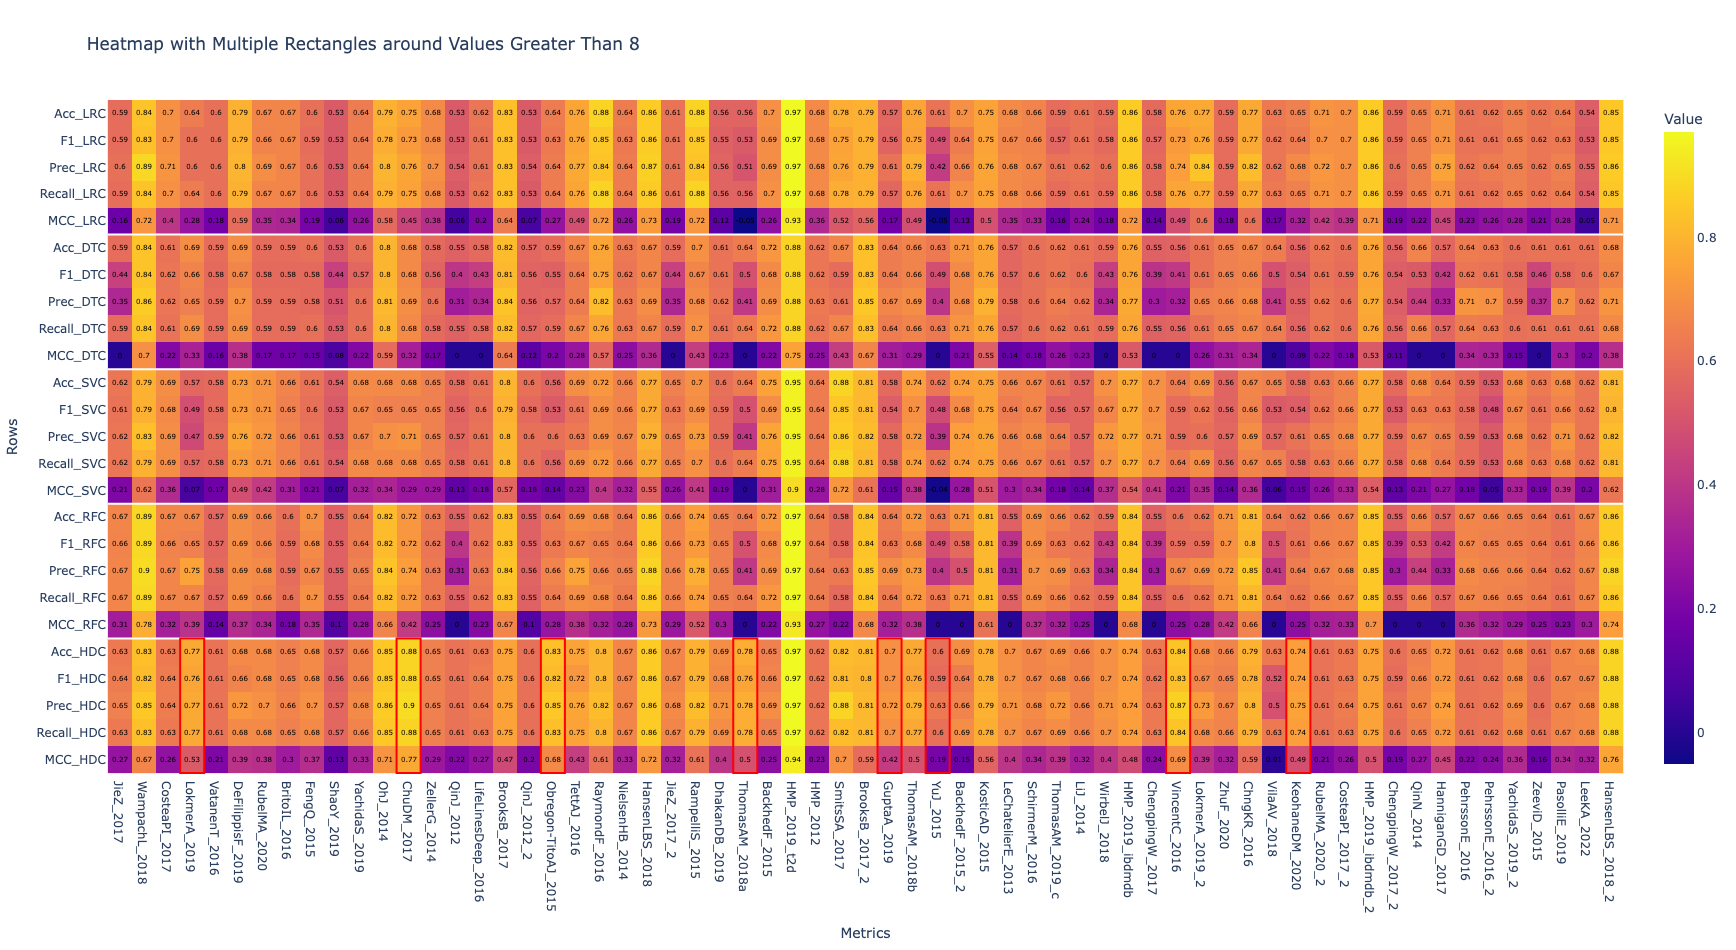

In [320]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sys
import pandas as pd
import numpy as np
import sys, os

def check_peformance(values, th=0.01):
    last_value = values[-1]
    # Check if the last value is greater than all other values by at least the threshold
    is_significantly_greater = all((last_value - value) >= th for value in values[:-1])

    if is_significantly_greater:
        return True
    else:
        return False
    
def ResultSummary(file):
    DF = pd.read_csv(file, sep='\t')
    DF.set_index('name', inplace=True)
    df = DF
    # df.columns = ReturnUniqueColumnName(df.columns.to_list())
    
    column_anno = {}
    for n in df.columns.to_list():
        # Initialize an empty list to store the slicing indices
        slices = []
        mean_values = []
        # Set the step size for the intervals
        step = 5

        # Create a loop to generate the slice indices
        for i in range(0, 25, step):  # 25 represents the total number of elements
            # Define the start and end of the slice
            start = i
            end = i + 4  # 4 represents the span or width of each slice
            # Append the slice to the list
            slices.append(f"{start}:{end}")
            # print(df[[n]][start:end])
            mean_values.append(round(np.mean(df[[n]][start:end]), 3))
        # print(mean_values)
        column_anno[n] = check_peformance(mean_values,  th=threshold)
    return column_anno

results = ResultSummary(input_file)

true_columns = []
for i, k in enumerate(results.keys()):
    if results[k]:  
        true_columns.append((i, results[k], k))

true_columns

DF = pd.read_csv(input_file, sep='\t')
DF.set_index('name', inplace=True)
df = DF
df.index.name = 'name'
# df.columns = ReturnUniqueColumnName(df.columns.to_list())
###Fix Duplicate Column Names ############################

heatmap = go.Heatmap(
    z=df.values,
    x=df.columns,
    y=df.index,
    # colorscale='Viridis',
    colorbar=dict(title='Value'),
    text=df.values,  # Display values in each cell
    texttemplate="%{text}",  # Format for text
    textfont=dict(color='black'),  # Ensure text is visible on darker colors
)

shapes = []


for i in range(5, len(df), 5):  # Start from the 3rd row and add lines every 2 rows
    shapes.append(
        go.layout.Shape(
            type='line',
            x0=-0.5,  # Start from the left edge
            x1=len(df.columns) - 0.5,  # End at the right edge
            y0=i - 0.5,  # Position for the horizontal line
            y1=i - 0.5,
            line=dict(color='white', width=2),  # White line with a thickness of 2
        )
    )

# Find all cells with values greater than 8

for c in true_columns:
    col_idx = c[0]  # Get the index of the column
    row_idx = 20    # Get the index of the row
    shape = go.layout.Shape(
        type='rect',
        x0=col_idx - 0.5,
        x1=col_idx + 0.5,
        y0=row_idx - 0.5,
        y1=row_idx + 4.5,
        line=dict(color='red', width=2),  # Red border for the rectangle
        fillcolor='rgba(255, 255, 255, 0)',  # Transparent fill
    )
    shapes.append(shape)  # Add this shape to the list of shapes

# Create the figure and add the heatmap and shapes
fig = go.Figure(data=[heatmap])
fig.update_layout(
    width=1800,  # Adjust based on your needs
    height=950,
    # autosize=True,
    shapes=shapes,  # Add all the shapes (rectangles)
    title='Heatmap with Multiple Rectangles around Values Greater Than 8',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Rows'),
    yaxis_autorange='reversed',  # Ensures correct orientation
)

# Display the heatmap with the rectangle
# fig.show()

In [308]:
fig.write_image(input_file.split('.')[0]+'.svg', format="svg")

In [318]:
# !pip install plotnine